In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
df1=df.drop(columns=["Unnamed: 0","year","month"],axis=1)

In [11]:
df1.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


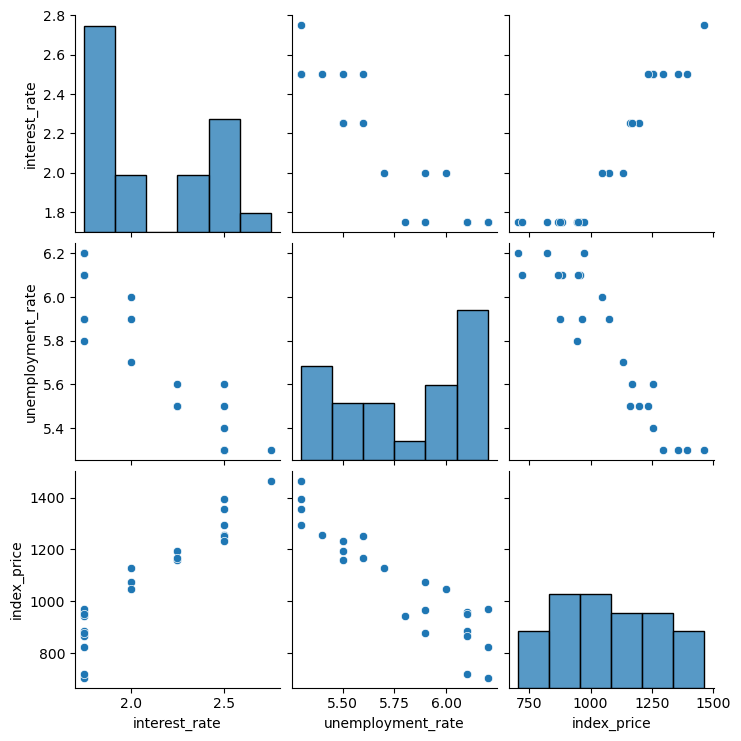

In [12]:
sns.pairplot(df1)

In [13]:
df1.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [24]:
# independent and dependent values
X=df1[["interest_rate","unemployment_rate"]]
Y=df1['index_price']

In [25]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [26]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [28]:
# X=df1.iloc[:,:-1]
# Y=df1.iloc[:,-1]
# print(X)
# print(Y)

In [34]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [44]:
# sns.regplot(df1["interest_rate"],df1["index_price"])

In [45]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [46]:
scaler=StandardScaler()

In [49]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [52]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [54]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [55]:
regression.fit(X_train,Y_train)

LinearRegression()

In [58]:
from sklearn.model_selection import cross_val_score
validation_Score=cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv=3)

In [59]:
validation_Score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [65]:
# mean_square_error
np.mean(validation_Score) 

-5914.828180162389

In [66]:
Y_pred=regression.predict(X_test)

In [67]:
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [68]:
# performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)


In [69]:
print(mse,mae,rmse)

8108.567426306611 73.80444932337099 90.04758423359624


In [70]:
score=r2_score(Y_test,Y_pred)
score

0.7591371539010254

In [71]:
# adjusted r square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5985619231683756

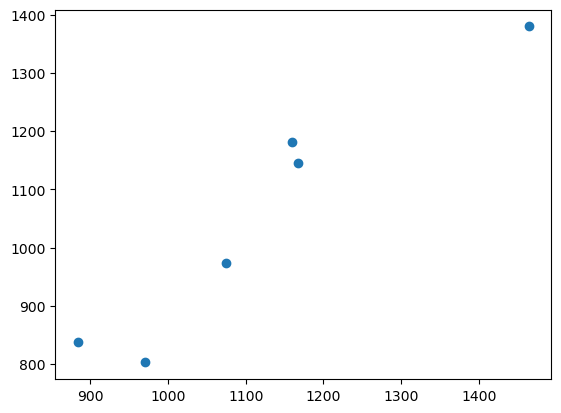

In [72]:
plt.scatter(Y_test,Y_pred)

In [73]:
residuals=Y_test-Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


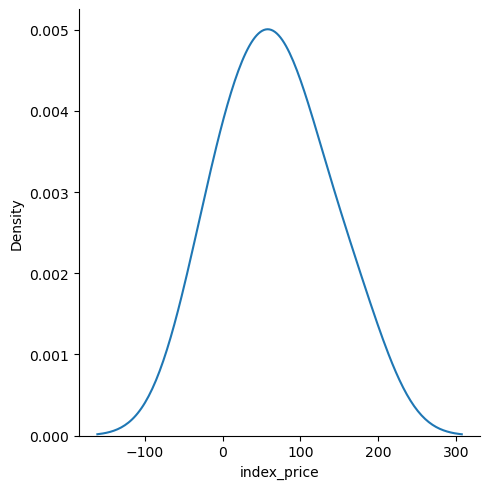

In [74]:
sns.displot(residuals,kind='kde')

In [75]:
# model is good if we get normal curve

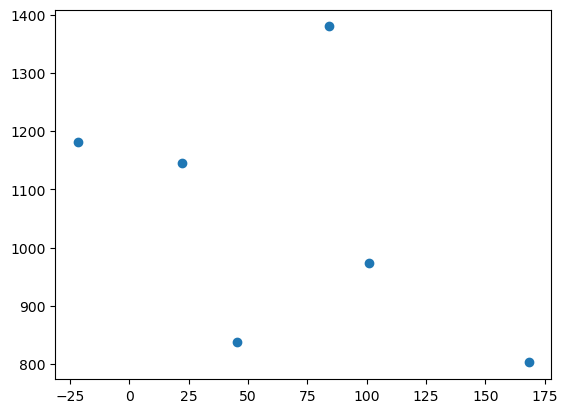

In [76]:
plt.scatter(residuals,Y_pred)

In [ ]:
# above data is distributed uniformly

In [77]:
# OLS regression
import statsmodels.api as sm

In [78]:
model=sm.OLS(Y_train,X_train).fit()

In [79]:
prediction=model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [80]:
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 01 Jun 2024   Prob (F-statistic):                       0.754
Time:                        15:22:04   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
regression.coef_

array([  88.27275507, -116.25716066])